In [172]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

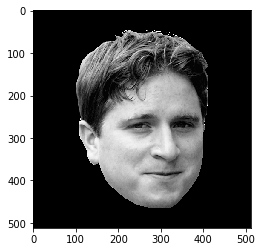

In [173]:
face_cascade = cv.CascadeClassifier('xml/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('xml/haarcascade_eye.xml')
img = cv.imread('img/kppa.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img)

True

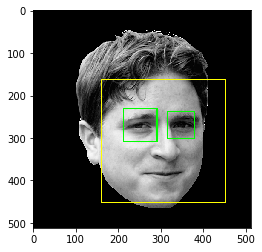

In [174]:
# Reconocimiento de rostro y ojos
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        #cv.Rectangle(img, pt1, pt2, color, thickness=1, lineType=8, shift=0) 
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        #cv.Circle(img, center, radius, color, thickness=1, lineType=8, shift=0)
        #cv.circle(roi_color, (ex+ew//2,ey+eh//2), 10,(0,255,9),20)
plt.imshow(img, cmap='gray')
cv.imwrite("result/sv-1.png", img)

(512, 512, 3)
(512, 512, 3)


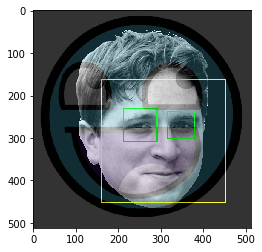

In [175]:
# Image Blending
imgMask= cv.imread('img/fc.jpg')
imgC=img.copy()

dst = cv.addWeighted(imgC,0.8,imgMask,0.2,0) # imagen, peso
plt.imshow(dst)
print(imgC.shape)
print(imgMask.shape)

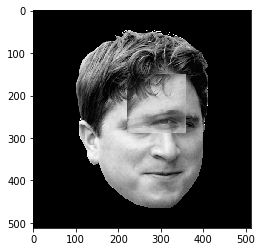

In [176]:
# Blending en un sector

# imagen fondo
imgB=img.copy() 
grayB=gray.copy()

# imagen para agregar
parte=grayB[160:300, 160:300] 
rows,cols=parte.shape

# puntos x,y donde aparecerá la mezcla
posx=150
posy=220

# realizo la mezcla
mezcla=cv.addWeighted(grayB[posx:rows+posx:1, posy:cols+posy:1],0.25,parte[::1,::1],0.75,0)

# sustituir con la mezcla
grayB[posx:rows+posx:1, posy:cols+posy:1]=mezcla[::1,::1]
plt.imshow(grayB,cmap='gray')

dtype('uint8')

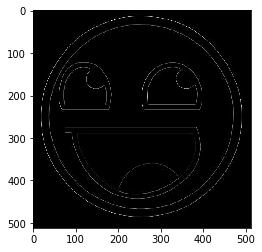

In [177]:
# filtro pasabajo: gaussiano
# filtro pasaalto: laplaciano
gray2 = cv.cvtColor(imgMask, cv.COLOR_BGR2GRAY)
laplacian = cv.Laplacian(gray2,cv.CV_8U)
#lap = cv.Laplacian(gray2,cv.CV_16S)
#laplacian = cv.convertScaleAbs(lap)
plt.imshow(laplacian,cmap='gray')
gray.dtype

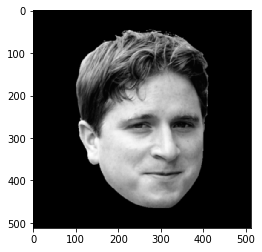

In [178]:
blur = cv.GaussianBlur(gray,(5,5),0)
plt.imshow(blur,cmap='gray')

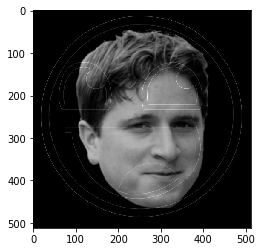

In [183]:
mezcla2=cv.addWeighted(blur,0.6,laplacian,0.4,0)
#mezcla2=laplacian+blur
plt.imshow(mezcla2,cmap='gray')